In [0]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [94]:
dataset=pd.read_csv('drug200.csv')
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [95]:
dataset.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

In [96]:
dataset.shape
dataset.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [0]:
#CONVERTING CATEGORICAL FEATURES TO NUMERICAL VALUES
dataset.loc[dataset.Sex=='F','Sex']=0
dataset.loc[dataset.Sex=='M','Sex']=1

dataset.loc[dataset.BP=='LOW','BP']=1
dataset.loc[dataset.BP=='NORMAL','BP']=2
dataset.loc[dataset.BP=='HIGH','BP']=0

dataset.loc[dataset.Cholesterol=='NORMAL','Cholesterol']=1
dataset.loc[dataset.Cholesterol=='HIGH','Cholesterol']=0


In [98]:
dataset[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [99]:
X=dataset.drop('Drug',axis=1)
print(X)
x=X.values

     Age Sex BP Cholesterol  Na_to_K
0     23   0  0           0   25.355
1     47   1  1           0   13.093
2     47   1  1           0   10.114
3     28   0  2           0    7.798
4     61   0  1           0   18.043
..   ...  .. ..         ...      ...
195   56   0  1           0   11.567
196   16   1  1           0   12.006
197   52   1  2           0    9.894
198   23   1  2           1   14.020
199   40   0  1           1   11.349

[200 rows x 5 columns]


In [100]:
type(x)

numpy.ndarray

In [0]:
y=dataset['Drug']

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=3)
print(x_train.shape)                                                                               

(140, 5)


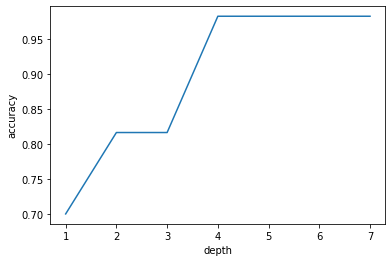

In [103]:
#Best depth for the model
accuracy=[]
for i in range(1,8):
  model=DecisionTreeClassifier(criterion='entropy',max_depth=i)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc=accuracy_score(y_pred,y_test)
  accuracy.append(acc)

plt.plot(range(1,8),accuracy)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.show()
best_depth=accuracy.index(max(accuracy))+1

In [105]:
#Plot shows that accuracy is high at 4 and above values.
best_depth

4

In [0]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)

In [107]:
print(y_pred_test[0:5])
print(y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [108]:
accuracy=accuracy_score(y_pred_test,y_test)
print(accuracy)

0.9833333333333333


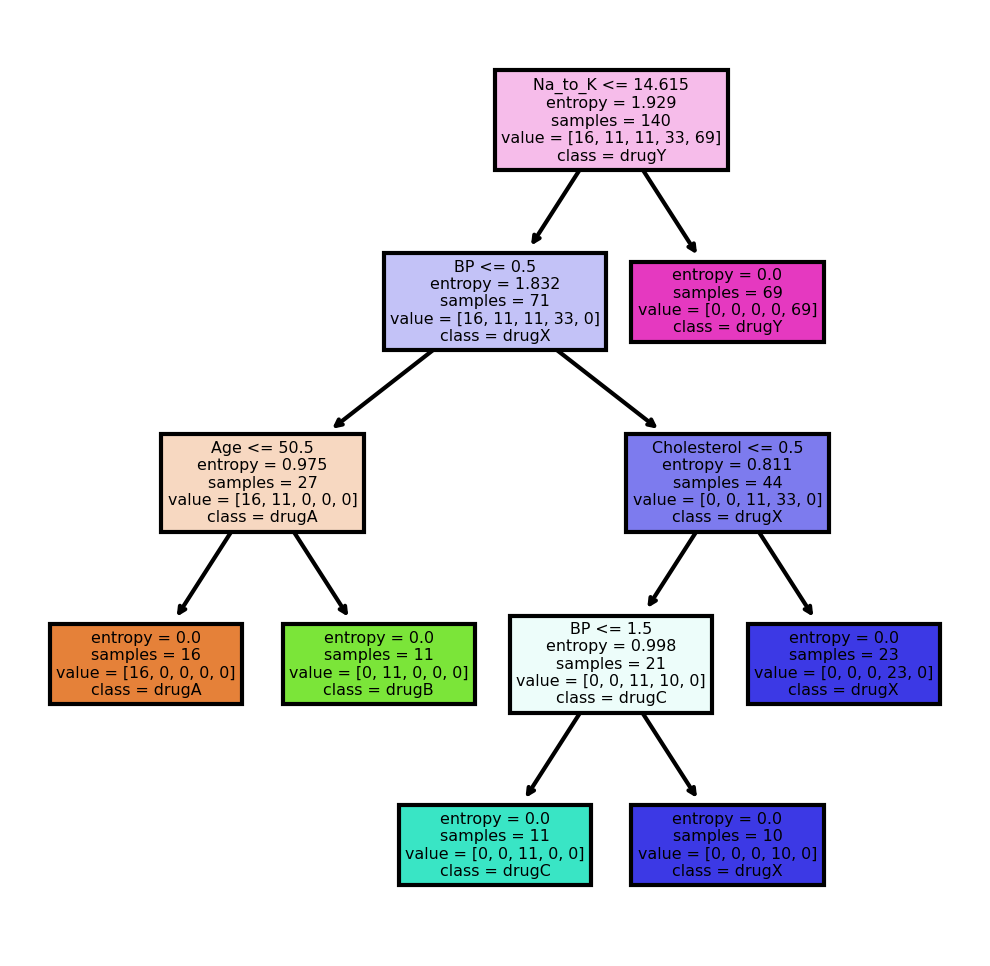

In [109]:
#visualising decision tree
features=['Age', 'Sex', 'BP', 'Cholesterol',  'Na_to_K']
labels=['drugA','drugB','drugC','drugX','drugY'] #label names must be given in ascending order
#fig=plt.figure()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names=features,class_names=labels,filled=True)

#saving the file
fig.savefig('tree.png')